<a href="https://colab.research.google.com/github/SuprajaYadavH/Hackathon/blob/Chaithra/census_inflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from google.colab import drive

In [3]:
drive.mount("/content/drive")

Mounted at /content/drive


In [4]:
df_2001=pd.read_excel("/content/drive/MyDrive/census inflow data/2001-PC01_D02_29.xls",header=1, skiprows=[2, 3])

In [5]:
df_2001.head()

,Table,State Code,District Code,Name,Place of last residence,Total/ Rural/ Urban,Rural Urban status of place of Enumeration,Total migrants,Total migrants(male),Total migrants(female),...,Duration of Residence In Place of Enumeration (5-9 years female),Duration of Residence In Place of Enumeration (10-19 years total persons),Duration of Residence In Place of Enumeration (10-19 years male),Duration of Residence In Place of Enumeration (10-19 years female),Duration of Residence In Place of Enumeration (20+ years total persons),Duration of Residence In Place of Enumeration (20+ years male),Duration of Residence In Place of Enumeration (20+ years female),Duration of Residence In Place of Enumeration (period not stated total persons),Duration of Residence In Place of Enumeration (period not stated male),Duration of Residence In Place of Enumeration (period not stated female)
0,D0302,29.0,0.0,STATE - KARNATAKA 29,Total,Total,Urban,6253747.0,3013790.0,3239957.0,...,498808.0,1249294.0,553994.0,695300.0,1351772.0,621671.0,730101.0,1233852.0,647999.0,585853.0
1,D0302,29.0,0.0,STATE - KARNATAKA 29,Last residence elsewhere in India,Total,Total,16518648.0,5664248.0,10854400.0,...,1552144.0,3584091.0,1034016.0,2550075.0,4768283.0,1165585.0,3602698.0,2402277.0,1239052.0,1163225.0
2,D0302,29.0,0.0,STATE - KARNATAKA 29,Last residence elsewhere in India,Total,Rural,10284475.0,2661557.0,7622918.0,...,1054629.0,2337951.0,481718.0,1856233.0,3419940.0,545787.0,2874153.0,1170384.0,592141.0,578243.0
3,D0302,29.0,0.0,STATE - KARNATAKA 29,Last residence elsewhere in India,Total,Urban,6234173.0,3002691.0,3231482.0,...,497515.0,1246140.0,552298.0,693842.0,1348343.0,619798.0,728545.0,1231893.0,646911.0,584982.0
4,D0302,29.0,0.0,STATE - KARNATAKA 29,Last residence elsewhere in India,Rural,Total,11272947.0,3161993.0,8110954.0,...,1202259.0,2771372.0,700648.0,2070724.0,3902648.0,802666.0,3099982.0,472379.0,195081.0,277298.0


In [6]:
df_2001.shape

(14028, 28)

In [7]:
df_2001.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14028 entries, 0 to 14027
Data columns (total 28 columns):
 #   Column                                                                           Non-Null Count  Dtype  
---  ------                                                                           --------------  -----  
 0   Table                                                                            14027 non-null  object 
 1   State Code                                                                       14026 non-null  float64
 2   District Code                                                                    14026 non-null  float64
 3   Name                                                                             14026 non-null  object 
 4   Place of last residence                                                          14026 non-null  object 
 5   Total/ Rural/ Urban                                                              14026 non-null  object 
 6   Rural 

In [8]:
df_2001.isnull().sum()

Table                                                                              1
State Code                                                                         2
District Code                                                                      2
Name                                                                               2
Place of last residence                                                            2
Total/ Rural/ Urban                                                                2
Rural Urban  status of place of Enumeration                                        2
Total migrants                                                                     2
Total migrants(male)                                                               2
Total migrants(female)                                                             2
Duration of Residence In Place of Enumeration (less than 1 year total persons)     2
Duration of Residence In Place of Enumeration (less than 1 year m

In [9]:
df_2001= df_2001.dropna()

In [10]:
df_2001 = df_2001.fillna(0)
df_2001 = df_2001.fillna(df_2001.mean())

<ipython-input-10-8d3fc7bf40b4>:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_2001 = df_2001.fillna(df_2001.mean())


In [11]:
df_2001.isnull().sum()

Table                                                                              0
State Code                                                                         0
District Code                                                                      0
Name                                                                               0
Place of last residence                                                            0
Total/ Rural/ Urban                                                                0
Rural Urban  status of place of Enumeration                                        0
Total migrants                                                                     0
Total migrants(male)                                                               0
Total migrants(female)                                                             0
Duration of Residence In Place of Enumeration (less than 1 year total persons)     0
Duration of Residence In Place of Enumeration (less than 1 year m

In [12]:
df_2001["Name"].value_counts()

District - Davanagere * 14        501
District - Belgaum 01             501
District - Mysore 26              501
District - Kodagu 25              501
District - Dakshina Kannada 24    501
District - Hassan 23              501
District - Mandya 22              501
District - Bangalore Rural 21     501
District - Bangalore 20           501
District - Kolar 19               501
District - Tumkur 18              501
District - Chikmagalur 17         501
District - Udupi * 16             501
District - Shimoga 15             501
District - Chamarajanagar * 27    501
District - Chitradurga 13         501
District - Bellary 12             501
District - Haveri * 11            501
District - Uttara Kannada 10      501
District - Dharwad 09             501
District - Gadag * 08             501
District - Koppal * 07            501
District - Raichur 06             501
District - Bidar 05               501
District - Gulbarga 04            501
District - Bijapur 03             501
District - B

In [13]:
#taking only bangalore data
blr_df_2001 = df_2001.loc[df_2001["Name"].isin(["District - Bangalore Rural 21", "District - Bangalore 20"]), :]

In [14]:
blr_df_2001.head()

,Table,State Code,District Code,Name,Place of last residence,Total/ Rural/ Urban,Rural Urban status of place of Enumeration,Total migrants,Total migrants(male),Total migrants(female),...,Duration of Residence In Place of Enumeration (5-9 years female),Duration of Residence In Place of Enumeration (10-19 years total persons),Duration of Residence In Place of Enumeration (10-19 years male),Duration of Residence In Place of Enumeration (10-19 years female),Duration of Residence In Place of Enumeration (20+ years total persons),Duration of Residence In Place of Enumeration (20+ years male),Duration of Residence In Place of Enumeration (20+ years female),Duration of Residence In Place of Enumeration (period not stated total persons),Duration of Residence In Place of Enumeration (period not stated male),Duration of Residence In Place of Enumeration (period not stated female)
10018,D0302,29.0,20.0,District - Bangalore 20,Total,Total,Total,2545271.0,1367046.0,1178225.0,...,165599.0,456866.0,237909.0,218957.0,500232.0,275682.0,224550.0,658472.0,345120.0,313352.0
10019,D0302,29.0,20.0,District - Bangalore 20,Total,Total,Rural,227257.0,102826.0,124431.0,...,18733.0,33890.0,12005.0,21885.0,32852.0,7639.0,25213.0,56201.0,29612.0,26589.0
10020,D0302,29.0,20.0,District - Bangalore 20,Total,Total,Urban,2318014.0,1264220.0,1053794.0,...,146866.0,422976.0,225904.0,197072.0,467380.0,268043.0,199337.0,602271.0,315508.0,286763.0
10021,D0302,29.0,20.0,District - Bangalore 20,Last residence elsewhere in India,Total,Total,2532657.0,1359701.0,1172956.0,...,164785.0,454990.0,236853.0,218137.0,497942.0,274400.0,223542.0,656923.0,344293.0,312630.0
10022,D0302,29.0,20.0,District - Bangalore 20,Last residence elsewhere in India,Total,Rural,226582.0,102400.0,124182.0,...,18677.0,33818.0,11957.0,21861.0,32794.0,7600.0,25194.0,56119.0,29572.0,26547.0


In [15]:
blr_df_2001.shape

(1002, 28)

In [16]:
blr_df_2001["Place of last residence"].value_counts()

Countries in Asia beyond India                                          138
Countries in Africa                                                      42
Countries in Europe                                                      36
Countries in Oceania                                                     24
Countries in America                                                     24
A & N Islands                                                            18
Pondicherry                                                              18
Last residence elsewhere in India                                        18
Jharkhand                                                                18
Orissa                                                                   18
Chhatisgargh                                                             18
Madhya Pradesh                                                           18
Gujarat                                                                  18
Daman & Diu 

In [17]:
df_2011=pd.read_excel("/content/drive/MyDrive/census inflow data/2011-DS-2900-D02-MDDS.XLSX",header=1, skiprows=[2, 3])

In [18]:
df_2011.head()

,Table,State Code,District Code,Name,Place of last residence,Total/ Rural/ Urban,Rural Urban status of place of Enumeration,Total migrants,Total migrants(male),Total migrants(female),...,Duration of Residence In Place of Enumeration (5-9 years female),Duration of Residence In Place of Enumeration (10-19 years total persons),Duration of Residence In Place of Enumeration (10-19 years male),Duration of Residence In Place of Enumeration (10-19 years female),Duration of Residence In Place of Enumeration (20+ years total persons),Duration of Residence In Place of Enumeration (20+ years male),Duration of Residence In Place of Enumeration (20+ years female),Duration of Residence In Place of Enumeration (period not stated total persons),Duration of Residence In Place of Enumeration (period not stated male),Duration of Residence In Place of Enumeration (period not stated female)
0,D0302,29.0,0.0,State - KARNATAKA,Total,Total,Urban,11588789.0,5581186.0,6007603.0,...,937747.0,1935063.0,886412.0,1048651.0,2390477.0,1112092.0,1278385.0,2693509.0,1377211.0,1316298.0
1,D0302,29.0,0.0,State - KARNATAKA,Last residence within India,Total,Total,26351178.0,10146322.0,16204856.0,...,2322321.0,4590713.0,1528155.0,3062558.0,7140395.0,2046082.0,5094313.0,5476338.0,2929325.0,2547013.0
2,D0302,29.0,0.0,State - KARNATAKA,Last residence within India,Total,Rural,14834268.0,4603631.0,10230637.0,...,1389950.0,2664411.0,646521.0,2017890.0,4758995.0,938936.0,3820059.0,2796619.0,1559308.0,1237311.0
3,D0302,29.0,0.0,State - KARNATAKA,Last residence within India,Total,Urban,11516910.0,5542691.0,5974219.0,...,932371.0,1926302.0,881634.0,1044668.0,2381400.0,1107146.0,1274254.0,2679719.0,1370017.0,1309702.0
4,D0302,29.0,0.0,State - KARNATAKA,Last residence within India,Rural,Total,14349732.0,4438286.0,9911446.0,...,1490873.0,2987817.0,864608.0,2123209.0,5091518.0,1222631.0,3868887.0,949410.0,433400.0,516010.0


In [19]:
df_2011.shape

(15531, 28)

In [20]:
df_2011.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15531 entries, 0 to 15530
Data columns (total 28 columns):
 #   Column                                                                           Non-Null Count  Dtype  
---  ------                                                                           --------------  -----  
 0   Table                                                                            15530 non-null  object 
 1   State Code                                                                       15529 non-null  float64
 2   District Code                                                                    15529 non-null  float64
 3   Name                                                                             15529 non-null  object 
 4   Place of last residence                                                          15529 non-null  object 
 5   Total/ Rural/ Urban                                                              15529 non-null  object 
 6   Rural 

In [21]:
df_2011.isnull().sum()

Table                                                                              1
State Code                                                                         2
District Code                                                                      2
Name                                                                               2
Place of last residence                                                            2
Total/ Rural/ Urban                                                                2
Rural Urban  status of place of Enumeration                                        2
Total migrants                                                                     2
Total migrants(male)                                                               2
Total migrants(female)                                                             2
Duration of Residence In Place of Enumeration (less than 1 year total persons)     2
Duration of Residence In Place of Enumeration (less than 1 year m

In [22]:
df_2011= df_2011.dropna()

In [23]:
df_2011 = df_2011.fillna(0)
df_2011 = df_2011.fillna(df_2011.mean())

<ipython-input-23-dcb4efb5f489>:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_2011 = df_2011.fillna(df_2011.mean())


In [24]:
df_2011.isnull().sum()

Table                                                                              0
State Code                                                                         0
District Code                                                                      0
Name                                                                               0
Place of last residence                                                            0
Total/ Rural/ Urban                                                                0
Rural Urban  status of place of Enumeration                                        0
Total migrants                                                                     0
Total migrants(male)                                                               0
Total migrants(female)                                                             0
Duration of Residence In Place of Enumeration (less than 1 year total persons)     0
Duration of Residence In Place of Enumeration (less than 1 year m

In [25]:
df_2011["Name"].value_counts()

Udupi                501
Chikmagalur          501
Bangalore Rural      501
Chikkaballapura      501
Kolar                501
Yadgir               501
Gulbarga             501
Chamarajanagar       501
Mysore               501
Kodagu               501
Dakshina Kannada     501
Hassan               501
Mandya               501
Bangalore            501
Tumkur               501
Ramanagara           501
Belgaum              501
Shimoga              501
Davanagere           501
Chitradurga          501
Bellary              501
Haveri               501
Uttara Kannada       501
Dharwad              501
Gadag                501
Koppal               501
Raichur              501
Bidar                501
Bijapur              501
Bagalkot             501
State - KARNATAKA    499
Name: Name, dtype: int64

In [26]:
#taking only bangalore data
blr_df_2011 = df_2011.loc[df_2011["Name"].isin(["Bangalore Rural", "Bangalore"]), :]

In [27]:
blr_df_2011.head()

,Table,State Code,District Code,Name,Place of last residence,Total/ Rural/ Urban,Rural Urban status of place of Enumeration,Total migrants,Total migrants(male),Total migrants(female),...,Duration of Residence In Place of Enumeration (5-9 years female),Duration of Residence In Place of Enumeration (10-19 years total persons),Duration of Residence In Place of Enumeration (10-19 years male),Duration of Residence In Place of Enumeration (10-19 years female),Duration of Residence In Place of Enumeration (20+ years total persons),Duration of Residence In Place of Enumeration (20+ years male),Duration of Residence In Place of Enumeration (20+ years female),Duration of Residence In Place of Enumeration (period not stated total persons),Duration of Residence In Place of Enumeration (period not stated male),Duration of Residence In Place of Enumeration (period not stated female)
9016,D0302,29.0,572.0,Bangalore,Total,Total,Total,5140755.0,2706024.0,2434731.0,...,415314.0,789872.0,414581.0,375291.0,870236.0,462448.0,407788.0,1117534.0,558551.0,558983.0
9017,D0302,29.0,572.0,Bangalore,Total,Total,Rural,532176.0,259610.0,272566.0,...,44879.0,62049.0,25030.0,37019.0,64557.0,17314.0,47243.0,114796.0,62079.0,52717.0
9018,D0302,29.0,572.0,Bangalore,Total,Total,Urban,4608579.0,2446414.0,2162165.0,...,370435.0,727823.0,389551.0,338272.0,805679.0,445134.0,360545.0,1002738.0,496472.0,506266.0
9019,D0302,29.0,572.0,Bangalore,Last residence within India,Total,Total,5090696.0,2678711.0,2411985.0,...,411349.0,784511.0,411592.0,372919.0,865072.0,459607.0,405465.0,1107641.0,553384.0,554257.0
9020,D0302,29.0,572.0,Bangalore,Last residence within India,Total,Rural,529700.0,258096.0,271604.0,...,44717.0,61788.0,24873.0,36915.0,64389.0,17239.0,47150.0,114388.0,61815.0,52573.0


In [28]:
blr_df_2011.shape

(1002, 28)

In [29]:
blr_df_2011["Place of last residence"].value_counts()

Countries in Asia beyond India                                          138
Countries in Africa                                                      42
Countries in Europe                                                      36
Countries in Oceania                                                     24
Countries in the Americas                                                24
Andaman & Nicobar Islands                                                18
Puducherry                                                               18
Last residence within India                                              18
Jharkhand                                                                18
Odisha                                                                   18
Chhattisgarh                                                             18
Madhya Pradesh                                                           18
Gujarat                                                                  18
Daman & Diu 

In [30]:
blr_df_2001

,Table,State Code,District Code,Name,Place of last residence,Total/ Rural/ Urban,Rural Urban status of place of Enumeration,Total migrants,Total migrants(male),Total migrants(female),...,Duration of Residence In Place of Enumeration (5-9 years female),Duration of Residence In Place of Enumeration (10-19 years total persons),Duration of Residence In Place of Enumeration (10-19 years male),Duration of Residence In Place of Enumeration (10-19 years female),Duration of Residence In Place of Enumeration (20+ years total persons),Duration of Residence In Place of Enumeration (20+ years male),Duration of Residence In Place of Enumeration (20+ years female),Duration of Residence In Place of Enumeration (period not stated total persons),Duration of Residence In Place of Enumeration (period not stated male),Duration of Residence In Place of Enumeration (period not stated female)
10018,D0302,29.0,20.0,District - Bangalore 20,Total,Total,Total,2545271.0,1367046.0,1178225.0,...,165599.0,456866.0,237909.0,218957.0,500232.0,275682.0,224550.0,658472.0,345120.0,313352.0
10019,D0302,29.0,20.0,District - Bangalore 20,Total,Total,Rural,227257.0,102826.0,124431.0,...,18733.0,33890.0,12005.0,21885.0,32852.0,7639.0,25213.0,56201.0,29612.0,26589.0
10020,D0302,29.0,20.0,District - Bangalore 20,Total,Total,Urban,2318014.0,1264220.0,1053794.0,...,146866.0,422976.0,225904.0,197072.0,467380.0,268043.0,199337.0,602271.0,315508.0,286763.0
10021,D0302,29.0,20.0,District - Bangalore 20,Last residence elsewhere in India,Total,Total,2532657.0,1359701.0,1172956.0,...,164785.0,454990.0,236853.0,218137.0,497942.0,274400.0,223542.0,656923.0,344293.0,312630.0
10022,D0302,29.0,20.0,District - Bangalore 20,Last residence elsewhere in India,Total,Rural,226582.0,102400.0,124182.0,...,18677.0,33818.0,11957.0,21861.0,32794.0,7600.0,25194.0,56119.0,29572.0,26547.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11015,D0302,29.0,21.0,District - Bangalore Rural 21,Countries in Oceania,Elsewhere,Rural,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11016,D0302,29.0,21.0,District - Bangalore Rural 21,Countries in Oceania,Elsewhere,Urban,3.0,2.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11017,D0302,29.0,21.0,District - Bangalore Rural 21,Unclassifiable,,Total,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11018,D0302,29.0,21.0,District - Bangalore Rural 21,Unclassifiable,,Rural,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [31]:
blr_df_2011

,Table,State Code,District Code,Name,Place of last residence,Total/ Rural/ Urban,Rural Urban status of place of Enumeration,Total migrants,Total migrants(male),Total migrants(female),...,Duration of Residence In Place of Enumeration (5-9 years female),Duration of Residence In Place of Enumeration (10-19 years total persons),Duration of Residence In Place of Enumeration (10-19 years male),Duration of Residence In Place of Enumeration (10-19 years female),Duration of Residence In Place of Enumeration (20+ years total persons),Duration of Residence In Place of Enumeration (20+ years male),Duration of Residence In Place of Enumeration (20+ years female),Duration of Residence In Place of Enumeration (period not stated total persons),Duration of Residence In Place of Enumeration (period not stated male),Duration of Residence In Place of Enumeration (period not stated female)
9016,D0302,29.0,572.0,Bangalore,Total,Total,Total,5140755.0,2706024.0,2434731.0,...,415314.0,789872.0,414581.0,375291.0,870236.0,462448.0,407788.0,1117534.0,558551.0,558983.0
9017,D0302,29.0,572.0,Bangalore,Total,Total,Rural,532176.0,259610.0,272566.0,...,44879.0,62049.0,25030.0,37019.0,64557.0,17314.0,47243.0,114796.0,62079.0,52717.0
9018,D0302,29.0,572.0,Bangalore,Total,Total,Urban,4608579.0,2446414.0,2162165.0,...,370435.0,727823.0,389551.0,338272.0,805679.0,445134.0,360545.0,1002738.0,496472.0,506266.0
9019,D0302,29.0,572.0,Bangalore,Last residence within India,Total,Total,5090696.0,2678711.0,2411985.0,...,411349.0,784511.0,411592.0,372919.0,865072.0,459607.0,405465.0,1107641.0,553384.0,554257.0
9020,D0302,29.0,572.0,Bangalore,Last residence within India,Total,Rural,529700.0,258096.0,271604.0,...,44717.0,61788.0,24873.0,36915.0,64389.0,17239.0,47150.0,114388.0,61815.0,52573.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15023,D0302,29.0,583.0,Bangalore Rural,Countries in Oceania,Elsewhere,Rural,9.0,6.0,3.0,...,0.0,3.0,1.0,2.0,0.0,0.0,0.0,3.0,2.0,1.0
15024,D0302,29.0,583.0,Bangalore Rural,Countries in Oceania,Elsewhere,Urban,13.0,6.0,7.0,...,3.0,1.0,0.0,1.0,1.0,0.0,1.0,6.0,4.0,2.0
15025,D0302,29.0,583.0,Bangalore Rural,Unclassifiable,Total,Total,40.0,19.0,21.0,...,3.0,6.0,2.0,4.0,8.0,3.0,5.0,7.0,4.0,3.0
15026,D0302,29.0,583.0,Bangalore Rural,Unclassifiable,Total,Rural,18.0,5.0,13.0,...,3.0,2.0,1.0,1.0,6.0,1.0,5.0,4.0,1.0,3.0


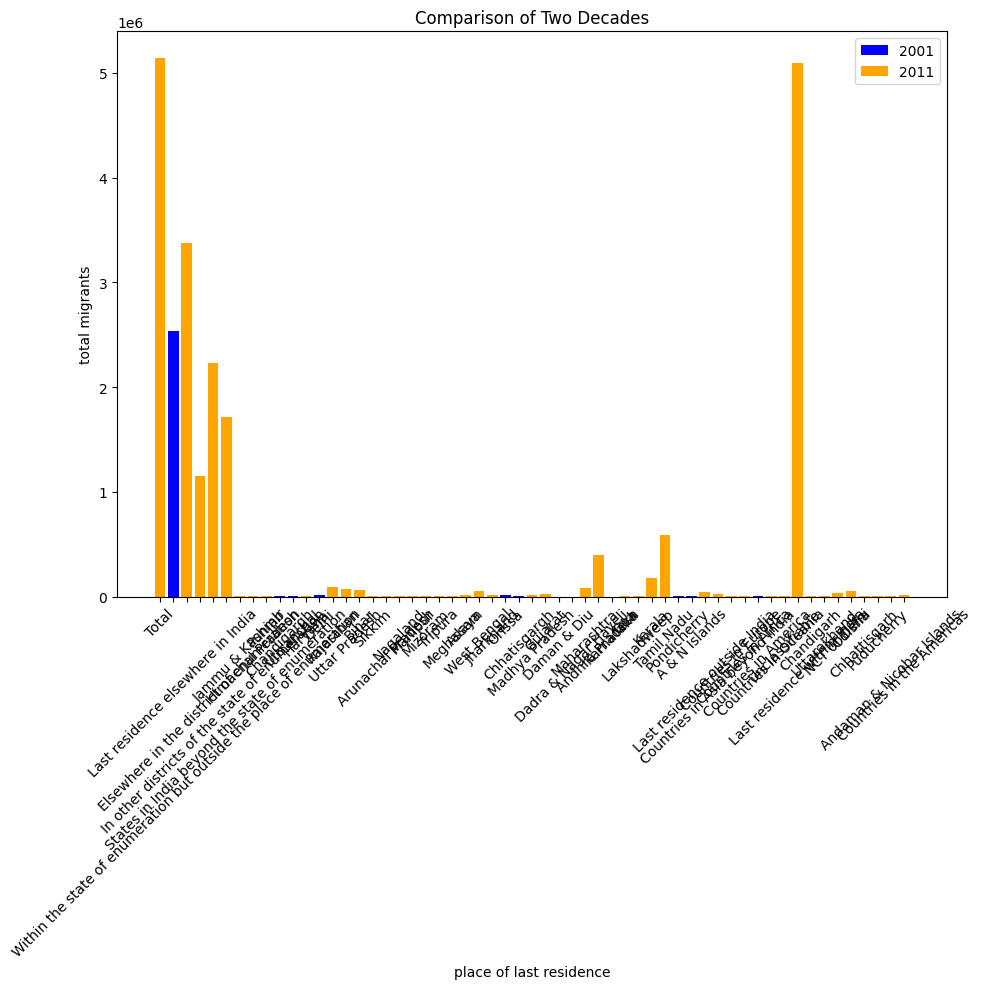

In [34]:
plt.figure(figsize=(10, 10))  # Adjust the figure size as needed

plt.bar(blr_df_2001['Place of last residence'], blr_df_2001['Total migrants'], label='2001', color='blue')
plt.bar(blr_df_2011['Place of last residence'], blr_df_2011['Total migrants'], label='2011', color='orange')

plt.xlabel('place of last residence')
plt.ylabel('total migrants')
plt.title('Comparison of Two Decades')
plt.legend()

plt.xticks(rotation=45)
plt.tight_layout()

plt.show()
#still working on this

In [35]:

# Group by the "Place of last residence" column and aggregate other columns
blr_df_2001 = blr_df_2001.groupby("Place of last residence").agg({
    "Total migrants": "sum",
    "Total migrants(male)": "sum",
    "Total migrants(female)": "sum",
    "Duration of Residence In Place of Enumeration (less than 1 year total persons)":"sum",
    "Duration of Residence In Place of Enumeration (less than 1 year male)":"sum",
    "Duration of Residence In Place of Enumeration (less than 1 year female)":"sum",
    "Duration of Residence In Place of Enumeration (1-4 years total persons) ":"sum",
    "Duration of Residence In Place of Enumeration (1-4 years male)":"sum",
    "Duration of Residence In Place of Enumeration (1-4 years female)":"sum",
    "Duration of Residence In Place of Enumeration (5-9 years total persons)":"sum",
    "Duration of Residence In Place of Enumeration (5-9 years male)":"sum",
    "Duration of Residence In Place of Enumeration (5-9 years female)":"sum",
    "Duration of Residence In Place of Enumeration (10-19 years total persons)":"sum",
    "Duration of Residence In Place of Enumeration (10-19 years male)":"sum",
    "Duration of Residence In Place of Enumeration (10-19 years female)":"sum",
    "Duration of Residence In Place of Enumeration (20+ years total persons)":"sum",
    "Duration of Residence In Place of Enumeration (20+ years male)":"sum",
    "Duration of Residence In Place of Enumeration (20+ years female)":"sum",
    "Duration of Residence In Place of Enumeration (period not stated total persons)":"sum",
    "Duration of Residence In Place of Enumeration (period not stated male)":"sum",
    "Duration of Residence In Place of Enumeration (period not stated female)":"sum"
}).reset_index()

print(blr_df_2001)


KeyError: ignored